# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

In [1]:
get_ipython().run_line_magic('autosave', '600')
from platform import python_version
print("python version: ",python_version())

Autosaving every 600 seconds
python version:  3.7.1


** Import numpy and pandas **

In [2]:
import numpy as np
print("numpy version: ",np.version.version)

import pandas as pd
print("pandas version: ",pd.__version__)

numpy version:  1.15.4
pandas version:  0.23.4


** Import visualization libraries and set %matplotlib inline. **

In [3]:
import matplotlib 
import matplotlib.pyplot as plt
print("matplotlib version: ",matplotlib.__version__)

import seaborn as sns
print("seaborn version: ",sns.__version__)

%matplotlib inline

matplotlib version:  3.0.2
seaborn version:  0.9.0


** Read in the csv file as a dataframe called df **

In [4]:
df=pd.read_csv('911.csv')

** Check the info() of the df **

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [7]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [8]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [9]:
df['title'].nunique()

110

In [10]:
df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [11]:
# define lambda function to parse the title and get the department
Reason = lambda title: title.split(':')[0]

** What is the most common Reason for a 911 call based off of this new column? **

In [12]:
# add a new column of 'Reason'
df['Reason'] = df['title'].apply(Reason)

In [13]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [14]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

EMS        48877
Traffic    35695
Fire       14920
Name: title, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

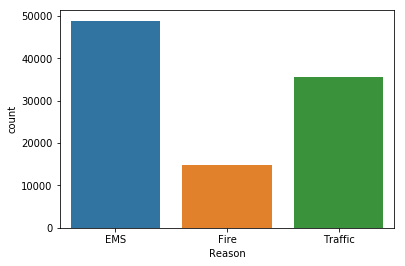

In [15]:
# for coutnplot we dont need to specify y, just give it data set = df
sns.countplot(x='Reason',data=df)

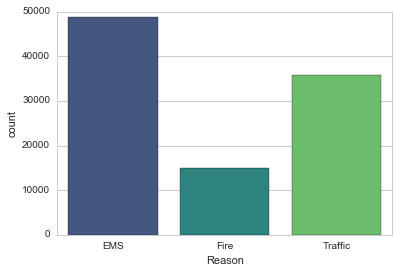

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [16]:
df['timeStamp'].dtypes
# dtype('O') means its a string

dtype('O')

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [17]:
df['Date_Time']=pd.to_datetime(df['timeStamp'])
df.info()
# now df['Date_Time'] is a datatime64 format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 11 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
Reason       99492 non-null object
Date_Time    99492 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 8.3+ MB


** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [18]:
df['Hour'] = df['Date_Time'].apply(lambda time: time.hour )
df['Month'] = df['Date_Time'].apply(lambda time: time.month )
df['Day of Week'] = df['Date_Time'].apply(lambda time: time.dayofweek )

#df['Date_Time'][0].date()

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Date_Time,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 17:40:00,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 17:40:01,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 17:40:01,17,12,3


** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [19]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [20]:
df['Day of Week_v2'] = df['Day of Week'].apply(lambda day: dmap[day] )

In [21]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Date_Time,Hour,Month,Day of Week,Day of Week_v2
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,17,12,3,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,17,12,3,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 17:40:00,17,12,3,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 17:40:01,17,12,3,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 17:40:01,17,12,3,Thu
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,2015-12-10 17:40:01,17,12,3,Thu
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,2015-12-10 17:40:01,17,12,3,Thu
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,2015-12-10 17:40:01,17,12,3,Thu
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS,2015-12-10 17:40:01,17,12,3,Thu
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,2015-12-10 17:40:01,17,12,3,Thu


** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

(0, 8000)

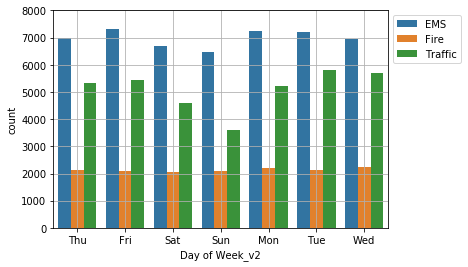

In [22]:
sns.countplot(x='Day of Week_v2',data=df, hue='Reason')
plt.legend(loc=2,bbox_to_anchor=(1, 1))
plt.grid()
plt.ylim(0,8000)

##it works too:
#xtick_tmp=np.arange(7)
#xtick_label= [dmap[a] for a in xtick_tmp]
#plt.xticks(ticks=xtick_tmp,labels=xtick_label)

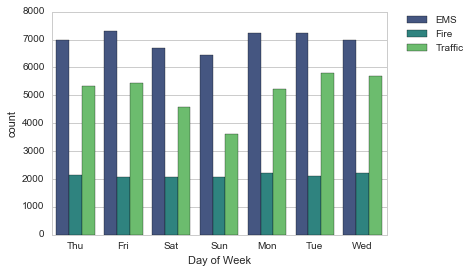

**Now do the same for Month:**

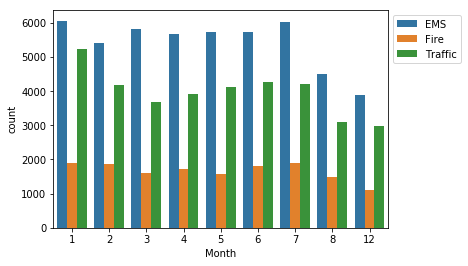

In [23]:
sns.countplot(x='Month',data=df, hue='Reason')
plt.legend(loc=2,bbox_to_anchor=(1, 1))

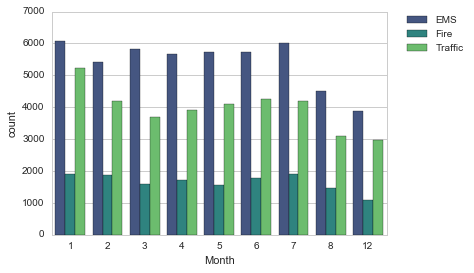

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [24]:
byMonth=df.groupby('Month')

In [25]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Date_Time,Hour,Month,Day of Week,Day of Week_v2
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,17,12,3,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,17,12,3,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 17:40:00,17,12,3,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 17:40:01,17,12,3,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 17:40:01,17,12,3,Thu
7969,40.121354,-75.363829,ROSEMONT AVE & W WASHINGTON ST; NORRISTOWN; S...,19401.0,EMS: ASSAULT VICTIM,2016-01-01 00:12:01,NORRISTOWN,ROSEMONT AVE & W WASHINGTON ST,1,EMS,2016-01-01 00:12:01,0,1,4,Fri
7970,40.140505,-75.310874,GERMANTOWN PIKE & HANNAH AVE; EAST NORRITON; ...,19401.0,EMS: FALL VICTIM,2016-01-01 00:17:00,EAST NORRITON,GERMANTOWN PIKE & HANNAH AVE,1,EMS,2016-01-01 00:17:00,0,1,4,Fri
7971,40.246837,-75.681381,VINE ST & CENTER ST; WEST POTTSGROVE; Station...,19464.0,EMS: ABDOMINAL PAINS,2016-01-01 00:22:00,WEST POTTSGROVE,VINE ST & CENTER ST,1,EMS,2016-01-01 00:22:00,0,1,4,Fri
7972,40.097222,-75.376195,MARK LN & DEAD END; UPPER MERION; Station 317...,NaN,EMS: ALTERED MENTAL STATUS,2016-01-01 00:27:01,UPPER MERION,MARK LN & DEAD END,1,EMS,2016-01-01 00:27:01,0,1,4,Fri
7973,40.148432,-75.219812,BANNOCKBURN AVE & S SPRING GARDEN ST; AMBLER;...,19002.0,EMS: DIABETIC EMERGENCY,2016-01-01 00:32:01,AMBLER,BANNOCKBURN AVE & S SPRING GARDEN ST,1,EMS,2016-01-01 00:32:01,0,1,4,Fri


In [26]:
byMonth_count=byMonth.count()
byMonth_count
# some numbers are different because something is missing wheb
# groupby month

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Date_Time,Hour,Day of Week,Day of Week_v2
Month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

In [27]:
byMonth_count['e']

Month
1     13205
2     11467
3     11101
4     11326
5     11423
6     11786
7     12137
8      9078
12     7969
Name: e, dtype: int64

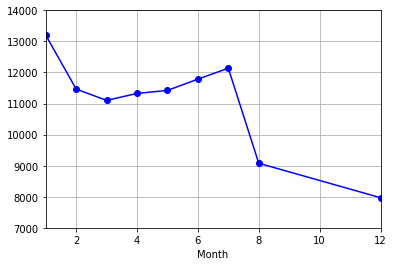

In [28]:
plt.plot(byMonth_count['e'],'bo-')
plt.xlim(1,12)
plt.xlabel('Month')

plt.ylim(7000,14000)

plt.grid()

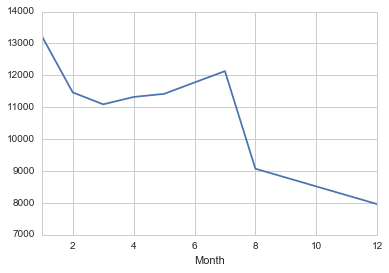

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

In [30]:
# use .index to create a month column so i can specify in 
# lmplot later
byMonth_count['Month']=byMonth.count().index
byMonth_count

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Date_Time,Hour,Day of Week,Day of Week_v2,Month
Month,,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205,1
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467,2
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101,3
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326,4
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423,5
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786,6
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137,7
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078,8
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969,12


/home/jun-chieh/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


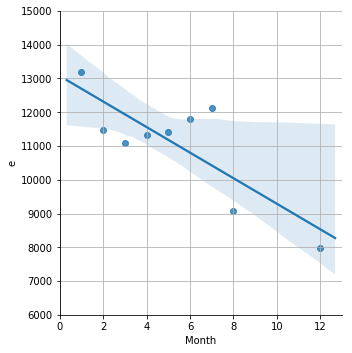

In [31]:
sns.lmplot(x='Month',y='e',data=byMonth_count)
plt.xlim(0,13)

plt.ylim(6000,15000)

plt.grid()

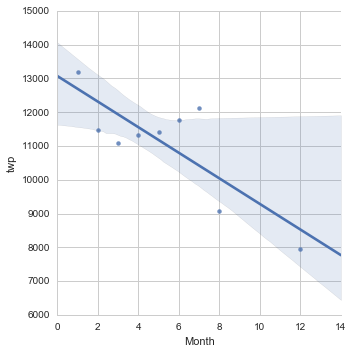

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [32]:
#df['Day of Week'] = df['Date_Time'].apply(lambda time: time.dayofweek )
df['Date']=df['Date_Time'].apply(lambda time: time.date() )
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
5        2015-12-10
6        2015-12-10
7        2015-12-10
8        2015-12-10
9        2015-12-10
10       2015-12-10
11       2015-12-10
12       2015-12-10
13       2015-12-10
14       2015-12-10
15       2015-12-10
16       2015-12-10
17       2015-12-10
18       2015-12-10
19       2015-12-10
20       2015-12-10
21       2015-12-10
22       2015-12-10
23       2015-12-10
24       2015-12-10
25       2015-12-10
26       2015-12-10
27       2015-12-10
28       2015-12-10
29       2015-12-10
            ...    
99462    2016-08-24
99463    2016-08-24
99464    2016-08-24
99465    2016-08-24
99466    2016-08-24
99467    2016-08-24
99468    2016-08-24
99469    2016-08-24
99470    2016-08-24
99471    2016-08-24
99472    2016-08-24
99473    2016-08-24
99474    2016-08-24
99475    2016-08-24
99476    2016-08-24
99477    2016-08-24
99478    2016-08-24
99479    2016-08-24
99480    2016-08-24


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [33]:
byDate=df.groupby('Date')

In [34]:
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Date_Time,Hour,Month,Day of Week,Day of Week_v2,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,17,12,3,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,17,12,3,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 17:40:00,17,12,3,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 17:40:01,17,12,3,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 17:40:01,17,12,3,Thu,2015-12-10
115,40.155060,-75.102251,DAVISVILLE RD & PENNYPACK RD; UPPER MORELAND;...,19040.0,EMS: CARDIAC EMERGENCY,2015-12-11 00:02:01,UPPER MORELAND,DAVISVILLE RD & PENNYPACK RD,1,EMS,2015-12-11 00:02:01,0,12,4,Fri,2015-12-11
116,40.083761,-75.142205,WASHINGTON LN & W CHURCH RD; CHELTENHAM; Stat...,19095.0,EMS: RESPIRATORY EMERGENCY,2015-12-11 00:06:25,CHELTENHAM,WASHINGTON LN & W CHURCH RD,1,EMS,2015-12-11 00:06:25,0,12,4,Fri,2015-12-11
117,40.119161,-75.342377,OAK ST & MAPLE ALY; NORRISTOWN; Station 308A;...,19401.0,EMS: MATERNITY,2015-12-11 00:41:03,NORRISTOWN,OAK ST & MAPLE ALY,1,EMS,2015-12-11 00:41:03,0,12,4,Fri,2015-12-11
118,40.088204,-75.326639,RIVER RD & 3RD ST; UPPER MERION; Station 317;...,19406.0,EMS: HEAD INJURY,2015-12-11 00:57:01,UPPER MERION,RIVER RD & 3RD ST,1,EMS,2015-12-11 00:57:01,0,12,4,Fri,2015-12-11
119,40.166304,-75.420285,RIDGE PIKE & S GRANGE AVE; LOWER PROVIDENCE; ...,19403.0,EMS: UNCONSCIOUS SUBJECT,2015-12-11 01:07:01,LOWER PROVIDENCE,RIDGE PIKE & S GRANGE AVE,1,EMS,2015-12-11 01:07:01,1,12,4,Fri,2015-12-11


In [35]:
byDate_count=byDate.count()
byDate_count

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Date_Time,Hour,Month,Day of Week,Day of Week_v2
Date,,,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447,447
2015-12-15,421,421,421,380,421,421,420,419,421,421,421,421,421,421,421
2015-12-16,377,377,377,343,377,377,377,376,377,377,377,377,377,377,377
2015-12-17,388,388,388,336,388,388,388,387,388,388,388,388,388,388,388
2015-12-18,346,346,346,306,346,346,346,346,346,346,346,346,346,346,346


In [36]:
byDate_count['e']

Date
2015-12-10    115
2015-12-11    396
2015-12-12    403
2015-12-13    319
2015-12-14    447
2015-12-15    421
2015-12-16    377
2015-12-17    388
2015-12-18    346
2015-12-19    279
2015-12-20    271
2015-12-21    430
2015-12-22    448
2015-12-23    524
2015-12-24    445
2015-12-25    323
2015-12-26    296
2015-12-27    317
2015-12-28    380
2015-12-29    365
2015-12-30    361
2015-12-31    318
2016-01-01    263
2016-01-02    335
2016-01-03    324
2016-01-04    402
2016-01-05    448
2016-01-06    434
2016-01-07    385
2016-01-08    359
             ... 
2016-07-26    446
2016-07-27    421
2016-07-28    443
2016-07-29    431
2016-07-30    353
2016-07-31    381
2016-08-01    384
2016-08-02    404
2016-08-03    403
2016-08-04    422
2016-08-05    422
2016-08-06    378
2016-08-07    332
2016-08-08    378
2016-08-09    350
2016-08-10    345
2016-08-11    449
2016-08-12    441
2016-08-13    393
2016-08-14    332
2016-08-15    360
2016-08-16    419
2016-08-17    415
2016-08-18    359
2016-

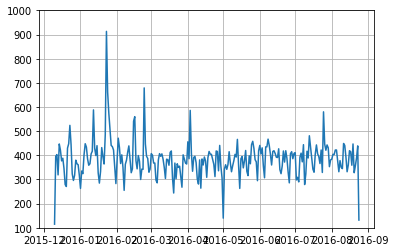

In [37]:
plt.plot(byDate_count['e'])
plt.ylim(100,1000)
plt.grid()

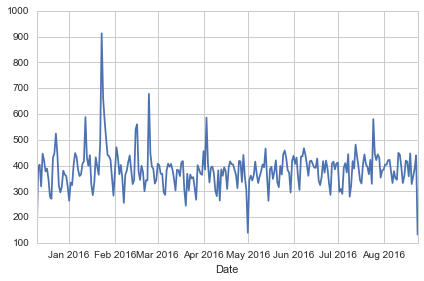

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

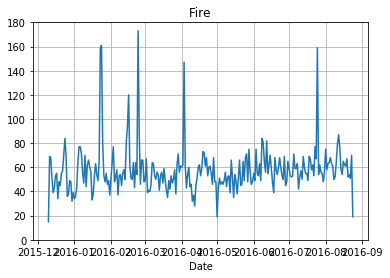

In [38]:
#df[df['Reason']=='Fire'].groupby('Date').count()
plt.plot(df[df['Reason']=='Fire'].groupby('Date').count()['e'])

plt.xlabel('Date')
plt.ylim(0,180)
plt.title('Fire')
plt.grid()

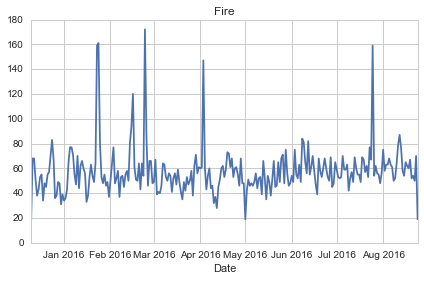

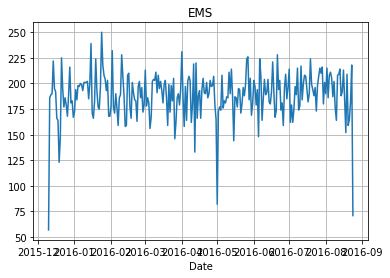

In [39]:
#df[df['Reason']=='EMS'].groupby('Date').count()
plt.plot(df[df['Reason']=='EMS'].groupby('Date').count()['e'])

plt.xlabel('Date')
plt.title('EMS')
plt.grid()

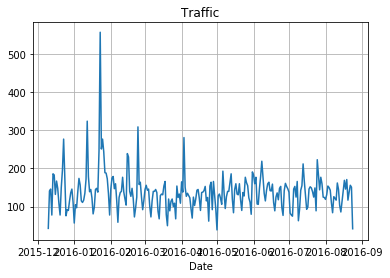

In [40]:
#df[df['Reason']=='Traffic'].groupby('Date').count()
plt.plot(df[df['Reason']=='Traffic'].groupby('Date').count()['e'])

plt.xlabel('Date')
plt.title('Traffic')
plt.grid()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [41]:
day_tmp  = np.zeros(168)
hour_tmp = np.zeros(168)
accu_tmp = np.zeros(168)

# Index Levels
kk=0
for ii in np.arange(0,7):
    for jj in np.arange(0,24):
        day_tmp[kk]  = ii     
        hour_tmp[kk] = jj
        accu_tmp[kk] = df[(df['Day of Week']==ii) & (df['Hour']==jj)]['e'].sum()
        kk=kk+1

hier_index = list(zip([dmap[ii] for ii in day_tmp],hour_tmp.astype(int)))

hier_index = pd.MultiIndex.from_tuples(hier_index)
df2 = pd.DataFrame(accu_tmp,index=hier_index,columns=[''])
df2

Mon 0   282.0
    1   221.0
    2   201.0
    3   194.0
    4   204.0
    5   267.0
    6   397.0
    7   653.0
    8   819.0
    9   786.0
    10  793.0
    11  822.0
    12  893.0
    13  842.0
    14  869.0
    15  913.0
    16  989.0
    17  997.0
    18  885.0
    19  746.0
    20  613.0
    21  497.0
    22  472.0
    23  325.0
Tue 0   269.0
    1   240.0
    2   186.0
    3   170.0
    4   209.0
    5   239.0
...       ...
Sat 18  778.0
    19  696.0
    20  628.0
    21  572.0
    22  506.0
    23  467.0
Sun 0   383.0
    1   306.0
    2   286.0
    3   268.0
    4   242.0
    5   240.0
    6   300.0
    7   402.0
    8   483.0
    9   620.0
    10  643.0
    11  693.0
    12  771.0
    13  679.0
    14  684.0
    15  691.0
    16  663.0
    17  714.0
    18  670.0
    19  655.0
    20  537.0
    21  461.0
    22  415.0
    23  330.0

[168 rows x 1 columns]

In [42]:
df2.unstack(level=-1)

\
        0      1      2      3      4      5      6      7      8      9    
Fri  275.0  235.0  191.0  175.0  201.0  194.0  372.0  598.0  742.0  752.0   
Mon  282.0  221.0  201.0  194.0  204.0  267.0  397.0  653.0  819.0  786.0   
Sat  375.0  301.0  263.0  260.0  224.0  231.0  257.0  391.0  459.0  640.0   
Sun  383.0  306.0  286.0  268.0  242.0  240.0  300.0  402.0  483.0  620.0   
Thu  278.0  202.0  233.0  159.0  182.0  203.0  362.0  570.0  777.0  828.0   
Tue  269.0  240.0  186.0  170.0  209.0  239.0  415.0  655.0  889.0  880.0   
Wed  250.0  216.0  189.0  209.0  156.0  255.0  410.0  701.0  875.0  808.0   

     ...                                                                     \
     ...       14     15      16      17     18     19     20     21     22   
Fri  ...    932.0  980.0  1039.0   980.0  820.0  696.0  667.0  559.0  514.0   
Mon  ...    869.0  913.0   989.0   997.0  885.0  746.0  613.0  497.0  472.0   
Sat  ...    789.0  796.0   848.0   757.0  778.0  696.0  628.0  572.0  506.0   
Sun  ...    684.0  691.0   663.0   714.0  670.0  655.0  537.0  461.0  415.0   
Thu  ...    876.0  969.0   935.0  1013.0  810.0  698.0  617.0  553.0  424.0   
Tue  ...    943.0  938.0  1026.0  1019.0  905.0  731.0  647.0  571.0  462.0   
Wed  ...    904.0  867.0   990.0  1037.0  894.0  686.0  668.0  575.0  490.0   

            
        23  
Fri  474.0  
Mon  325.0  
Sat  467.0  
Sun  330.0  
Thu  354.0  
Tue  274.0  
Wed  335.0  

[7 rows x 24 columns]

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

Text(87.0, 0.5, 'Day of week')

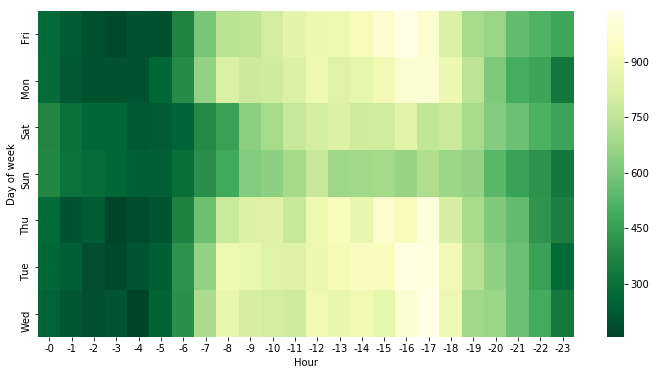

In [44]:
# sometimes use *_r can get the reverse of cmap
plt.subplots(figsize=(12,6))
sns.heatmap(df2.unstack(level=-1),cmap='YlGn_r')
plt.xlabel('Hour')
plt.ylabel('Day of week')

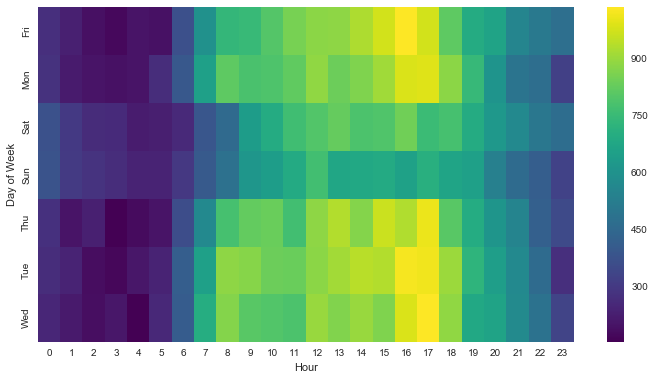

** Now create a clustermap using this DataFrame. **

Text(142.17218543046357, 0.5, 'Day of week')

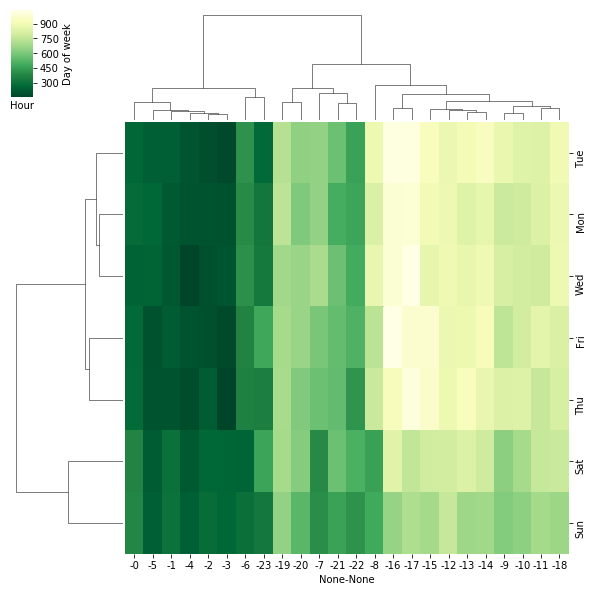

In [46]:
#plt.subplots(figsize=(12,6))
sns.clustermap(df2.unstack(level=-1),cmap='YlGn_r')
plt.xlabel('Hour')
plt.ylabel('Day of week')

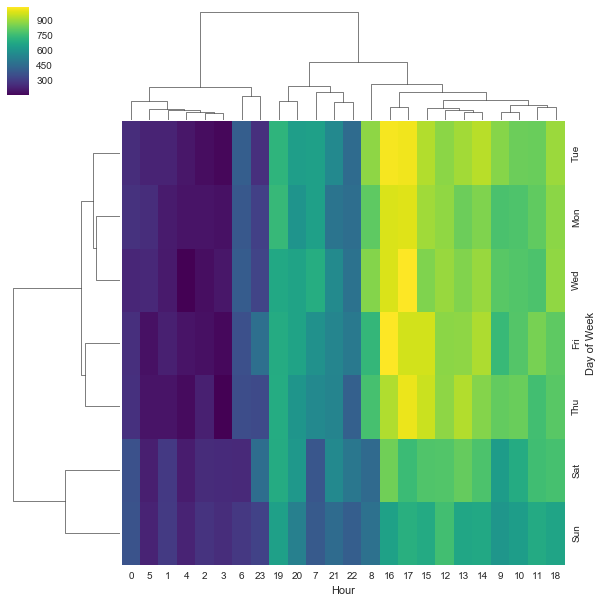

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


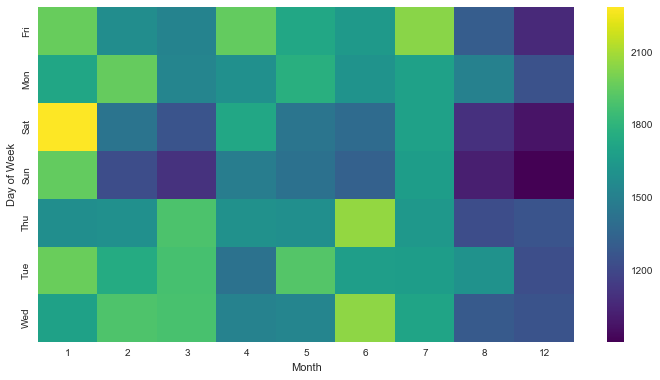

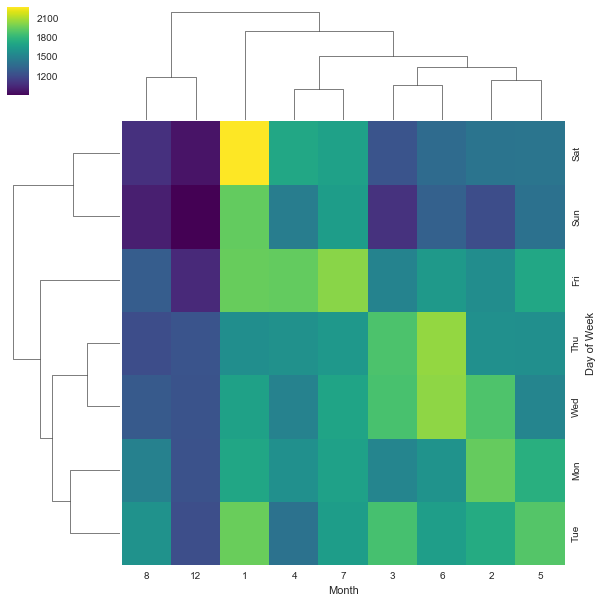

**Continue exploring the Data however you see fit!**
# Great Job!